### Calculate the intensity of a Gaussian beam at a specific position and the fraction of power within an area

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

%matplotlib inline

from pyConstants import *
from SrConstants import *

In [2]:
def accel_onresonance(intensity):
    sat_param = intensity/redIsat
    acc = (hbar*kVecRed*redGamma/(2*mSr88))*sat_param/(1+sat_param)
    return acc 

# intensity of a circular Gaussian beam at the position rad 
# in terms of its waist radius and power
def laguerre_gauss_int(rad,power,waistRad):
    intensity = (2*power/(np.pi*waistRad**2))*np.exp(-2*rad**2/waistRad**2)
    return intensity

# percentage of beam power inside a certain radius 
def percentagePowerInside(rad,waistRad):
    return 1-np.exp(-2*rad**2/waistRad**2)

Power is 1 mW, beam rad is 7 mm, lines: 200
Max acceleration:  1528.986475410838  m/s^2


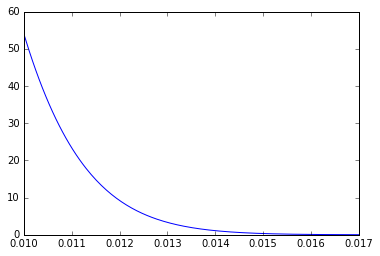

In [3]:
powerLaser = 1 # mW
beam_radius = 7 # mm
number_lines = 200
positions = np.linspace(10e-3,17e-3,200)
intensities = [laguerre_gauss_int(pos,powerLaser*1e-3,beam_radius*1e-3)/number_lines for pos in positions]
accelerations = [accel_onresonance(inten) for inten in intensities]
plt.plot(positions,accelerations)
print("Power is %.i mW, beam rad is %.i mm, lines: %.i"%(powerLaser,beam_radius,number_lines))
print("Max acceleration: ",hbar*kVecRed*redGamma/(2*mSr88)," m/s^2")

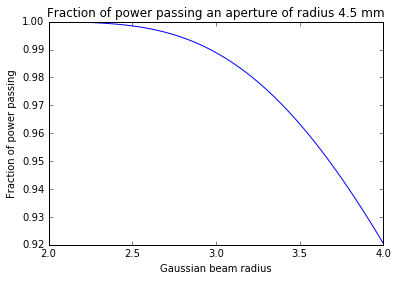

In [13]:
aperture_toPass = 9/2 #mm
radiiBeam = np.linspace(2,4) #mm
fractionsPowerIn = [percentagePowerInside(aperture_toPass,rB) for rB in radiiBeam]
plt.plot(radiiBeam,fractionsPowerIn)
plt.title("Fraction of power passing an aperture of radius %.1f mm"%aperture_toPass)
plt.xlabel('Gaussian beam radius')
plt.ylabel('Fraction of power passing')
plt.show()

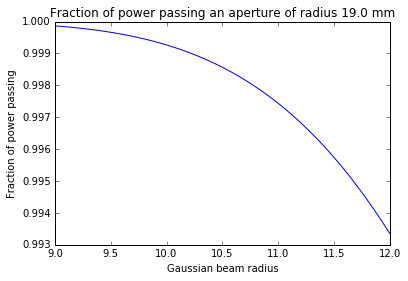

In [11]:
aperture_toPass = 38/2 #mm rad
radiiBeam = np.linspace(9,12) #mm
fractionsPowerIn = [percentagePowerInside(aperture_toPass,rB) for rB in radiiBeam]
plt.plot(radiiBeam,fractionsPowerIn)
plt.title("Fraction of power passing an aperture of radius %.1f mm"%aperture_toPass)
plt.xlabel('Gaussian beam radius')
plt.ylabel('Fraction of power passing')
plt.show()